# Part 1

In [16]:
import numpy as np
import sklearn
import nltk, string
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories)
labels = dataset.target
from pprint import pprint
pprint(list(dataset.target_names))

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey']


# Question 1: 
Report the dimensions of the TF-IDF matrix you get.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english',min_df=3)
X_train_tfidf = tfidf_vect.fit_transform(dataset.data) # making the tfidf matrix
print("Shape of TF-IDF matrix: ", X_train_tfidf.shape)

Shape of TF-IDF matrix:  (7882, 27768)


# QUESTION 2: 
Report the contingency table of your clustering result. You may usethe provided plotmat.py to visualize the matrix. Does the contingency matrix have to be square-shaped?
### A: The contigency matrix doesn't have to be square-shaped because the contingency table is a matrix which allows you to view the frequency of occurrence between the different combinations of your X and Y variables.

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score

y_true = [int(i/4) for i in dataset.target]

km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
print("Contingency table: \n", con_mat)

Contingency table: 
 [[   4 3899]
 [1718 2261]]


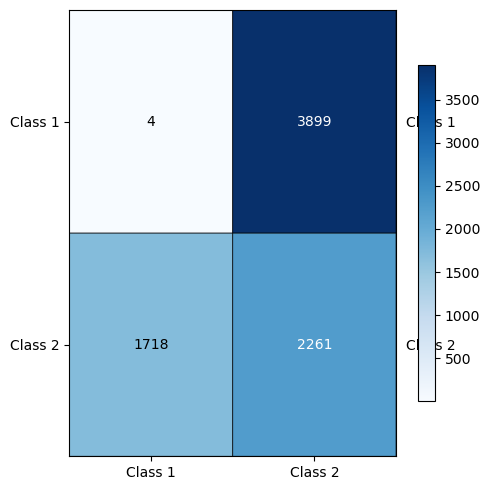

In [14]:
import sys
sys.path.append('.')
from plotmat import plot_mat
plot_mat(con_mat,size=(5,5),xticklabels = ['Class 1','Class 2'],yticklabels = ['Class 1','Class 2'],pic_fname = 'Q2.png')

# Question 3
Report the 5 clustering measures explained in the introduction for K-
means clustering.

In [20]:
print("Homogeneity: %0.3f" % homogeneity_score(y_true, y_pred))
print("Completeness : %0.3f" % completeness_score(y_true, y_pred))
print("V-measure : %0.3f" % v_measure_score(y_true, y_pred))
print("Adjusted Rand-Index : %.3f"% adjusted_rand_score(y_true, y_pred))
print("Adjusted Mutual Information Score : %.3f"% adjusted_mutual_info_score(y_true, y_pred))

Homogeneity: 0.254
Completeness : 0.335
V-measure : 0.289
Adjusted Rand-Index : 0.181
Adjusted Mutual Information Score : 0.289


# QUESTION 4: 
Report the plot of the percentage of variance that the top r principle
components retain v.s. r, for r = 1 to 1000.

Text(0, 0.5, 'Total Explained Variance Ratio')

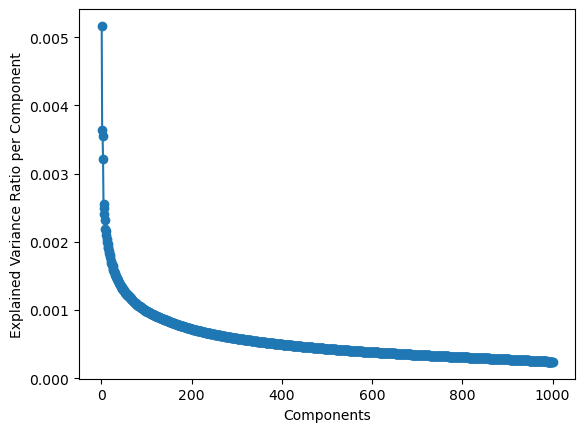

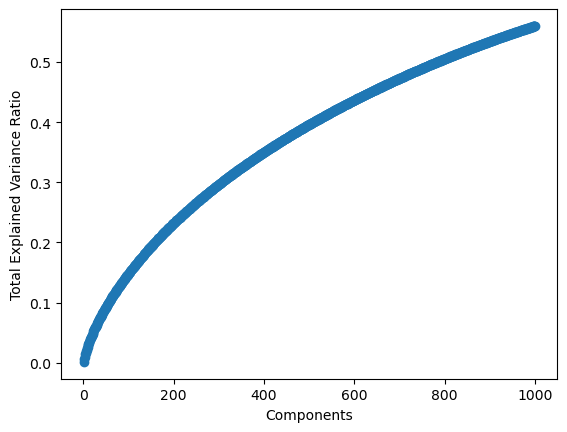

In [8]:
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.utils.extmath import randomized_svd

svd = TruncatedSVD(n_components=1000)
X_train_svd = svd.fit_transform(X_train_tfidf)
plt.figure()
plt.plot(np.arange(1000)+1,sorted(svd.explained_variance_ratio_,reverse=True))
plt.scatter(np.arange(1000)+1,sorted(svd.explained_variance_ratio_,reverse=True))
plt.xlabel("Components"); plt.ylabel("Explained Variance Ratio per Component")

plt.figure()
plt.plot(np.arange(1000)+1,np.cumsum(svd.explained_variance_ratio_))
plt.scatter(np.arange(1000)+1,np.cumsum(svd.explained_variance_ratio_))
plt.xlabel("Components"); plt.ylabel("Total Explained Variance Ratio")

# QUESTION 5:
Let r be the dimension that we want to reduce the data to (i.e. n components).
Try r = 1 −10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD
and NMF.
Report a good choice of r for SVD and NMF respectively.
Note: In the choice of r, there is a trade-off between the information preservation, and better performance of
k-means in lower dimensions.

### A: According to the charts below, the good choice of r for SVD and NMF is both 10.

SVD
Homogeneity score:  [0.00029275270509964866, 0.23462501869262953, 0.23622580967999646, 0.24162603939083188, 0.2459136851918752, 0.242488600144672]
Completeness score: [0.000297122118721392, 0.3212187345416125, 0.32242397160243236, 0.3257637898975148, 0.32972145379678475, 0.32714066941714903]
V-measure score:  [0.00029492122900643043, 0.2711767512281033, 0.27267481812015304, 0.27745655726190943, 0.28171670663624065, 0.2785246026362978]
Adjusted Rand score:  [0.0003281607588681523, 0.1577989589471986, 0.15961920123127504, 0.16679707546182895, 0.1707597324152979, 0.16679709209461066]
Adjusted Mutual Information score:  [0.00020271945487688344, 0.2710996208286373, 0.2725979456601095, 0.2773805882185429, 0.28164136314170246, 0.27844872472650617]


/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF
[0.0003003030178761853, 0.09267200875838809, 0.0019120402724064785, 0.008734874759382975, 0.003444719931676562, 0.002163728856299646]
[0.0003047688479979988, 0.21597065707166085, 0.0025441502068279777, 0.013232995618956961, 0.005663833745154288, 0.0032608953501375862]
[0.0003025194525487269, 0.129693246200255, 0.0021832628911060627, 0.01052341965173116, 0.004283955869143768, 0.0026013574758204493]
[0.0003390408027462719, 0.03383565814396721, 0.0012379619230262304, 0.005683121258793998, 0.0016856298724459546, 0.0011139455990844534]
[0.00021032082455495874, 0.12958167529017284, 0.002078940382781518, 0.01041426109884003, 0.004170558556580682, 0.0024915538823062316]


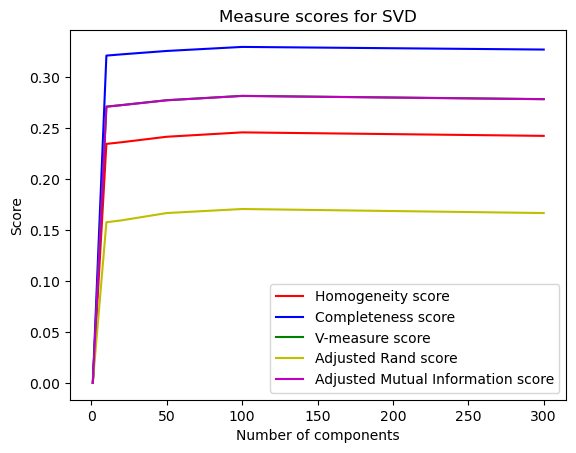

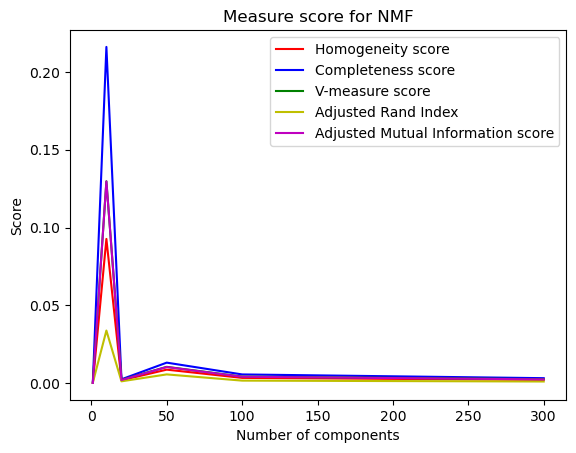

In [21]:
from sklearn.decomposition import NMF

r = [1,10,20,50,100,300]
hom_score = []; complt_score = []; v_score = []; adj_rand_score = []; adj_mut_inf_score = []
for i in r:
    y_pred = km.fit_predict(TruncatedSVD(n_components=i,random_state=42).fit_transform(X_train_tfidf))
    hom_score.append(homogeneity_score(y_true,y_pred))
    complt_score.append(completeness_score(y_true,y_pred))
    v_score.append(v_measure_score(y_true,y_pred))
    adj_rand_score.append(adjusted_rand_score(y_true,y_pred))
    adj_mut_inf_score.append(adjusted_mutual_info_score(y_true,y_pred))

fig, ax = plt.subplots()
ax.plot(r,hom_score, 'r', label='Homogeneity score')
ax.plot(r, complt_score, 'b', label='Completeness score')
ax.plot(r, v_score, 'g', label='V-measure score')
ax.plot(r,adj_rand_score,'y',label='Adjusted Rand score')
ax.plot(r,adj_mut_inf_score,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure scores for SVD")
print("SVD")
print('Homogeneity score: ', hom_score)
print('Completeness score:', complt_score)
print('V-measure score: ', v_score)
print('Adjusted Rand score: ', adj_rand_score)
print('Adjusted Mutual Information score: ', adj_mut_inf_score)

hom_score = []; complt_score = []; v_score = []; adj_rand_score = []; adj_mut_inf_score = []
for i in r:
    y_pred = km.fit_predict(NMF(n_components=i,init='random',random_state=42).fit_transform(X_train_tfidf))
    hom_score.append(homogeneity_score(y_true,y_pred))
    complt_score.append(completeness_score(y_true,y_pred))
    v_score.append(v_measure_score(y_true,y_pred))
    adj_rand_score.append(adjusted_rand_score(y_true,y_pred))
    adj_mut_inf_score.append(adjusted_mutual_info_score(y_true,y_pred))

fig, ax = plt.subplots()
ax.plot(r,hom_score, 'r', label='Homogeneity score')
ax.plot(r, complt_score, 'b', label='Completeness score')
ax.plot(r, v_score, 'g', label='V-measure score')
ax.plot(r,adj_rand_score,'y',label='Adjusted Rand Index')
ax.plot(r,adj_mut_inf_score,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure score for NMF")
print("NMF")
print(hom_score)
print(complt_score)
print(v_score)
print(adj_rand_score)
print(adj_mut_inf_score)


# QUESTION 6: 
How do you explain the non-monotonic behavior of the measures as r
increases?
### A: There is a non-monotonic behavior in the measures as r increases. As the number of components increases, the dimensions in which k-means needs to perform clustering increases. It is a well-known fact that k-means suffers from the curse of dimensionality because the Euclidean distance is not a good metric in high dimensions since the ratio between the nearest and farthest points approaches. This means that points in high dimensions are essentially equidistant from each other which makes it hard to perform clustering.

# QUESTION 7: 
Are these measures on average better than those computed in Question
3?
### A: The best result in SVD is better on average in the measures than the result computed just using tf-idf. However the best result using NMF is not better on average in the measures comparing to the rresults in question 3.

# QUESTION 8: 
Visualize the clustering results for:

•SVD with your optimal choice of r for K-Means clustering;

•NMF with your choice of r for K-Means clustering.

To recap, you can accomplish this by first creating the dense representations and then once again projecting these
representations into a 2-D plane for visualization.

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Text(0.5, 1.0, 'NMF Clustering for clustering label when r = 10')

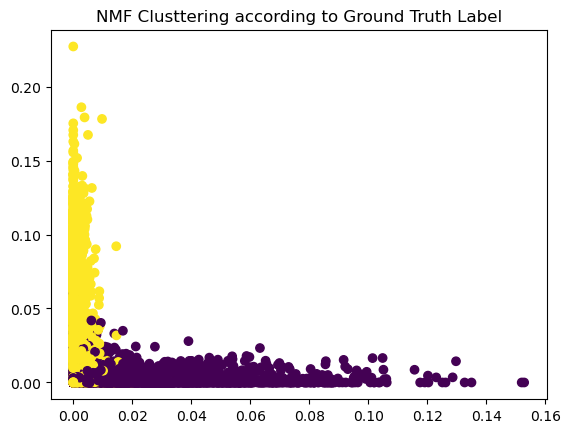

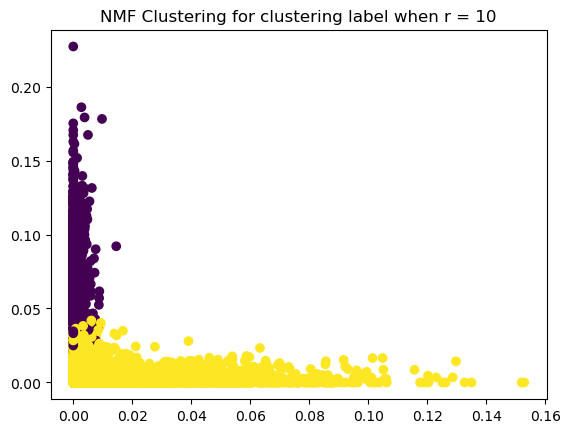

In [22]:
#Ground Truth plot for NMF r=10
from sklearn.decomposition import NMF
nmf_10 = NMF(n_components = 10).fit_transform(X_train_tfidf)
plt.figure()
plt.scatter(nmf_10[:,0],nmf_10[:,1],c=y_true)
plt.title("NMF Clusttering according to Ground Truth Label")
#Clustering label plot for NMF
c_nmf = km.fit_predict(nmf_10)
plt.figure()
plt.scatter(nmf_10[:,0],nmf_10[:,1], c=c_nmf)
plt.title('NMF Clustering for clustering label when r = 10')

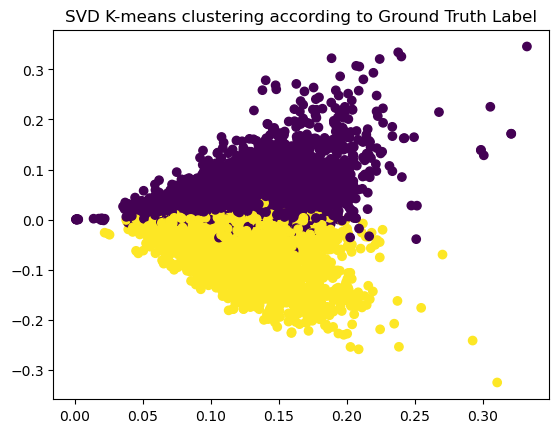

Text(0.5, 1.0, 'SVD K-means clustering according to Clustering Label when r = 10')

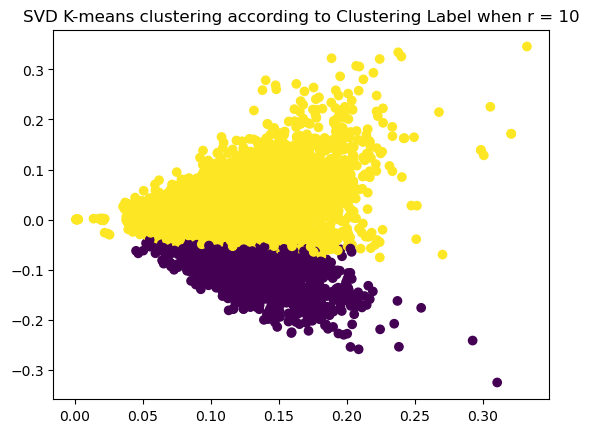

In [23]:
##Ground Truth plot for SVD 10
svd_10 = TruncatedSVD(n_components = 10).fit_transform(X_train_tfidf)
plt.show()
plt.scatter(svd_10[:,0],svd_10[:,1], c=y_true)
plt.title("SVD K-means clustering according to Ground Truth Label")
#Cluster label plot for SVD 10
svd_label = km.fit_predict(svd_10)
plt.show()
plt.scatter(svd_10[:,0],svd_10[:,1],c=svd_label)
plt.title("SVD K-means clustering according to Clustering Label when r = 10")

# QUESTION 9: 
What do you observe in the visualization? How are the data points of the
two classes distributed? Is distribution of the data ideal for K-Means clustering?

### A: By use of the Euclidean distance, K-means treats the data space as isotropic, from the above four plots, we can observe that there are both overlapping in both SVD and NMF, which implies that the euclidean distance of two centroid is close and the result may not be that accurate.  Also the clustering shsape return by NMF and SVD is both not in 2D spherical shape, especially in the NMF.

# QUESTION 10: 
Load documents with the same configuration as in Question 1, but for
ALL 20 categories. Construct the TF-IDF matrix, reduce its dimensionality using BOTH NMF
and SVD (specify settings you choose and why), and perform K-Means clustering with k=20 .
Visualize the contingency matrix and report the five clustering metrics (DO BOTH
NMF AND SVD).
There is a mismatch between cluster labels and class labels. For example, the cluster #3 may
correspond to the class #8. As a result, the high-value entries of the 20 ×20 contingency
matrix can be scattered around, making it messy to inspect, even if the clustering result is not
bad.
One can use scipy.optimize.linear_sum_assignment to identify the best-matching
cluster-class pairs, and permute the columns of the contingency matrix accordingly. See below
for an example:

In [8]:
#get data 
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.utils.extmath import randomized_svd
from scipy.optimize import linear_sum_assignment
dataset_20 = fetch_20newsgroups(subset='all')
labels20 = dataset_20.target
from pprint import pprint
pprint(list(dataset_20.target_names))
#do tfidf  
X20_train_tfidf = tfidf_vect.fit_transform(dataset_20.data) # making the tfidf matrix
print("Shape of TF-IDF matrix: ", X20_train_tfidf.shape)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
Shape of TF-IDF matrix:  (18846, 52295)


# Sparse Tfidf contigency matrix

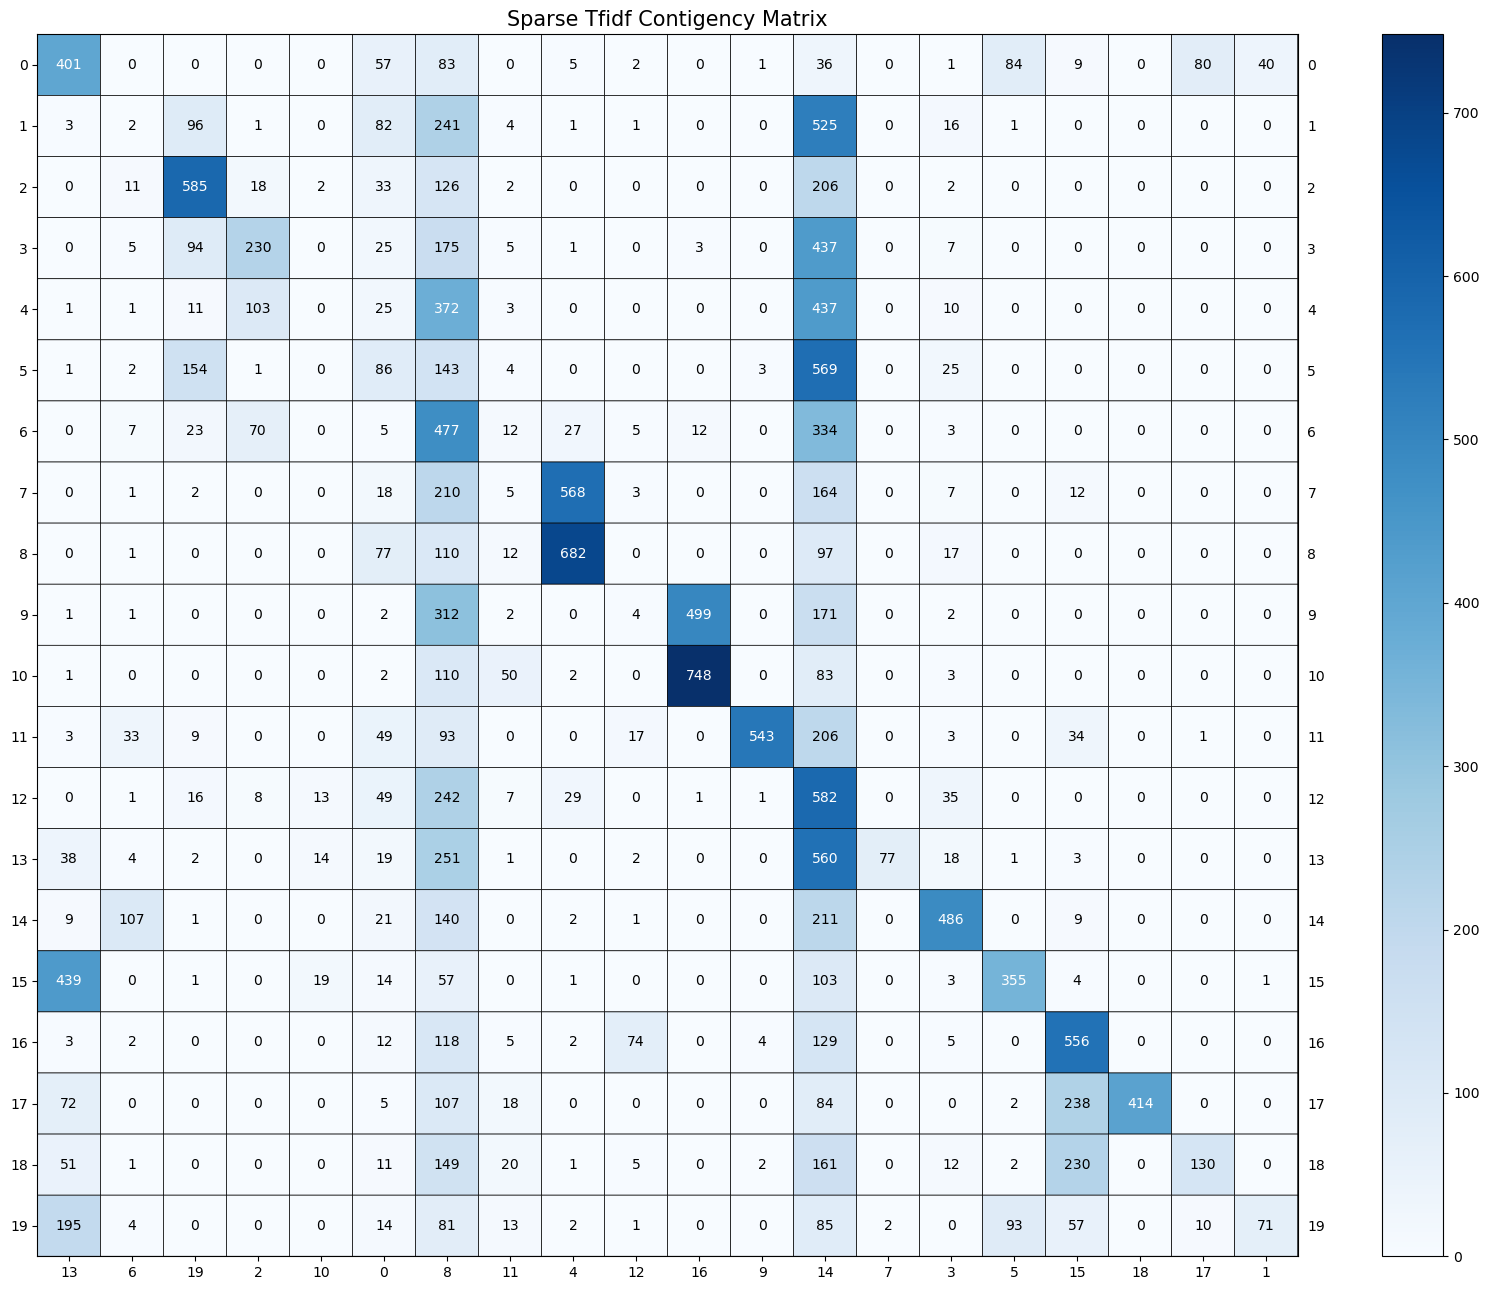

Homogeneity : 0.359
Completeness : 0.451
V-measure : 0.400
Adjusted Rand-Index : 0.137
Adjusted Mutual Information Score : 0.398


In [10]:
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30)
y20_pred = kmeans.fit_predict(X20_train_tfidf)
con_mat20 = contingency_matrix(labels20,y20_pred)
rows, cols = linear_sum_assignment(con_mat20, maximize=True)
plot_mat(con_mat20[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,13),title = "Sparse Tfidf Contigency Matrix")
print("Homogeneity : %0.3f" % homogeneity_score(labels20, y20_pred))
print("Completeness : %0.3f" % completeness_score(labels20, y20_pred))
print("V-measure : %0.3f" % v_measure_score(labels20, y20_pred))
print("Adjusted Rand-Index : %.3f"% adjusted_rand_score(labels20, y20_pred))
print("Adjusted Mutual Information Score : %.3f"% adjusted_mutual_info_score(labels20, y20_pred))

SVD
Homogeneity score:  [0.0280029766961423, 0.33868411668173454, 0.2879281718544785, 0.2942994589856629, 0.2757058935951528, 0.3012402772300583]
Completeness score: [0.031030705737015128, 0.3793967975868234, 0.3832889795236285, 0.41581412561515085, 0.37724085934887175, 0.46635795988432077]
V-measure score:  [0.029439197888506435, 0.3578863236978208, 0.32883455060593253, 0.3446599948539983, 0.3185788971564128, 0.36603992643892314]
Adjusted Rand score:  [0.0059278293874107085, 0.13685346508255025, 0.0930576459033265, 0.08858305613659094, 0.07908366130289018, 0.07362118184161288]
Adjusted Mutual Information score:  [0.026112451413343993, 0.35568197267845625, 0.3263237670102939, 0.3421392148434956, 0.31599844053794296, 0.36350804880170234]


/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF
[0.02799034702971921, 0.3132502923122217, 0.2673010122683917, 0.16880957127934254, 0.18146262738358176, 0.05043671469361167]
[0.03101686964391566, 0.3516077645149955, 0.3542070001268461, 0.24516322594036472, 0.2936876034600391, 0.08040111808325054]
[0.02942599207519214, 0.33132255488991563, 0.30467793752672073, 0.19994501736542303, 0.22432199626305488, 0.061987701381880714]
[0.005921185361535245, 0.12366905003452264, 0.09598777167737527, 0.03724263062190923, 0.03603421000888785, 0.008419083230890852]
[0.026099192131416624, 0.32902553876373025, 0.30207595419282024, 0.19680606439007128, 0.2211227452502638, 0.05809335283693487]


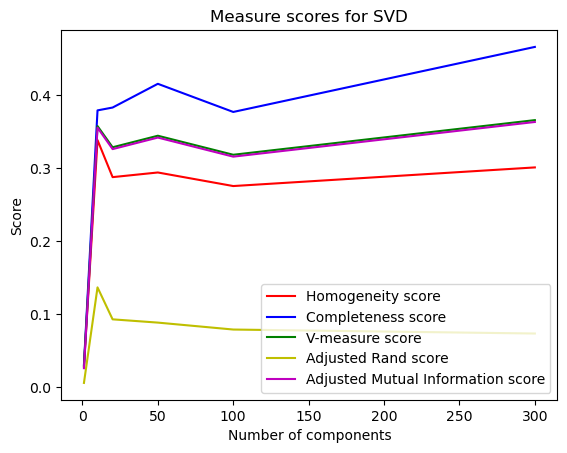

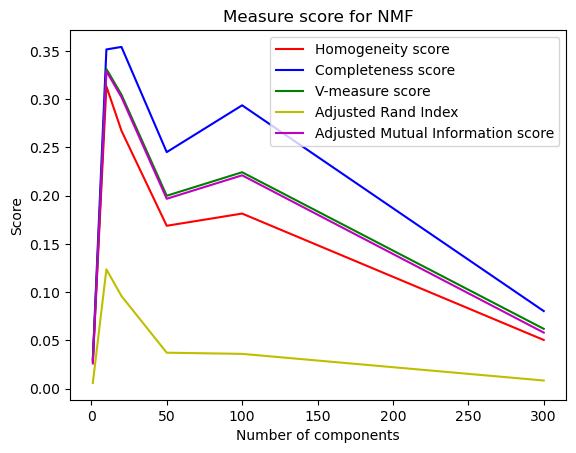

In [28]:
r = [1,10,20,50,100,300]
hom_score = []; complt_score = []; v_score = []; adj_rand_score = []; adj_mut_inf_score = []
for i in r:
    y20_pred = kmeans.fit_predict(TruncatedSVD(n_components=i,random_state=42).fit_transform(X20_train_tfidf))
    hom_score.append(homogeneity_score(labels20,y20_pred))
    complt_score.append(completeness_score(labels20,y20_pred))
    v_score.append(v_measure_score(labels20,y20_pred))
    adj_rand_score.append(adjusted_rand_score(labels20,y20_pred))
    adj_mut_inf_score.append(adjusted_mutual_info_score(labels20,y20_pred))

fig, ax = plt.subplots()
ax.plot(r,hom_score, 'r', label='Homogeneity score')
ax.plot(r, complt_score, 'b', label='Completeness score')
ax.plot(r, v_score, 'g', label='V-measure score')
ax.plot(r,adj_rand_score,'y',label='Adjusted Rand score')
ax.plot(r,adj_mut_inf_score,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure scores for SVD")
print("SVD")
print('Homogeneity score: ', hom_score)
print('Completeness score:', complt_score)
print('V-measure score: ', v_score)
print('Adjusted Rand score: ', adj_rand_score)
print('Adjusted Mutual Information score: ', adj_mut_inf_score)

hom_score = []; complt_score = []; v_score = []; adj_rand_score = []; adj_mut_inf_score = []
for i in r:
    y20_pred = kmeans.fit_predict(NMF(n_components=i,init='random',random_state=42).fit_transform(X20_train_tfidf))
    hom_score.append(homogeneity_score(labels20,y20_pred))
    complt_score.append(completeness_score(labels20,y20_pred))
    v_score.append(v_measure_score(labels20,y20_pred))
    adj_rand_score.append(adjusted_rand_score(labels20,y20_pred))
    adj_mut_inf_score.append(adjusted_mutual_info_score(labels20,y20_pred))

fig, ax = plt.subplots()
ax.plot(r,hom_score, 'r', label='Homogeneity score')
ax.plot(r, complt_score, 'b', label='Completeness score')
ax.plot(r, v_score, 'g', label='V-measure score')
ax.plot(r,adj_rand_score,'y',label='Adjusted Rand Index')
ax.plot(r,adj_mut_inf_score,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure score for NMF")
print("NMF")
print(hom_score)
print(complt_score)
print(v_score)
print(adj_rand_score)
print(adj_mut_inf_score)


/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF Contingency table: 
 [[  0  88 115  49   1   1   0   5  72   0 105   0   8   2   0   1 108 230
    0  14]
 [  0 162   4   0   8   0   0 417  18   0  99   3   0  13 102   1 125   1
    1  19]
 [  0  76   2   0   2   0   0 382  11   2  70  24   0  12 340   1  51   0
    0  12]
 [  0 127   1   0   2   0   0 228  24  87 136 202   0  16  38   6  95   0
    4  16]
 [  0 237   1   0   4   0   0 186  15  15  97 131   0   9   6   7 236   0
    2  17]
 [  0 110   0   0  15   0   0 470  20   0 123   1   0  18 133   1  73   0
   12  12]
 [  3 247   3   0   1   0   0  68  23  12 129  89   0  11   8  19 342   1
    1  18]
 [  0 219  81   0   4   0   0   8  71   0 335   2   0  16   0   7 242   0
    0   5]
 [  0 207  35   0   2   0   0  16 162   0 372   2   0  20   0  26 136   8
    0  10]
 [127  89   2   0   1   0   0   2  30   0 106   0   0   3   0 458 151   0
    0  25]
 [407  34   1   0   0   0   0   0   7   0  24   0   0   3   0 470  43   1
    0   9]
 [  0  51  31   0  11 243   0  32  46   

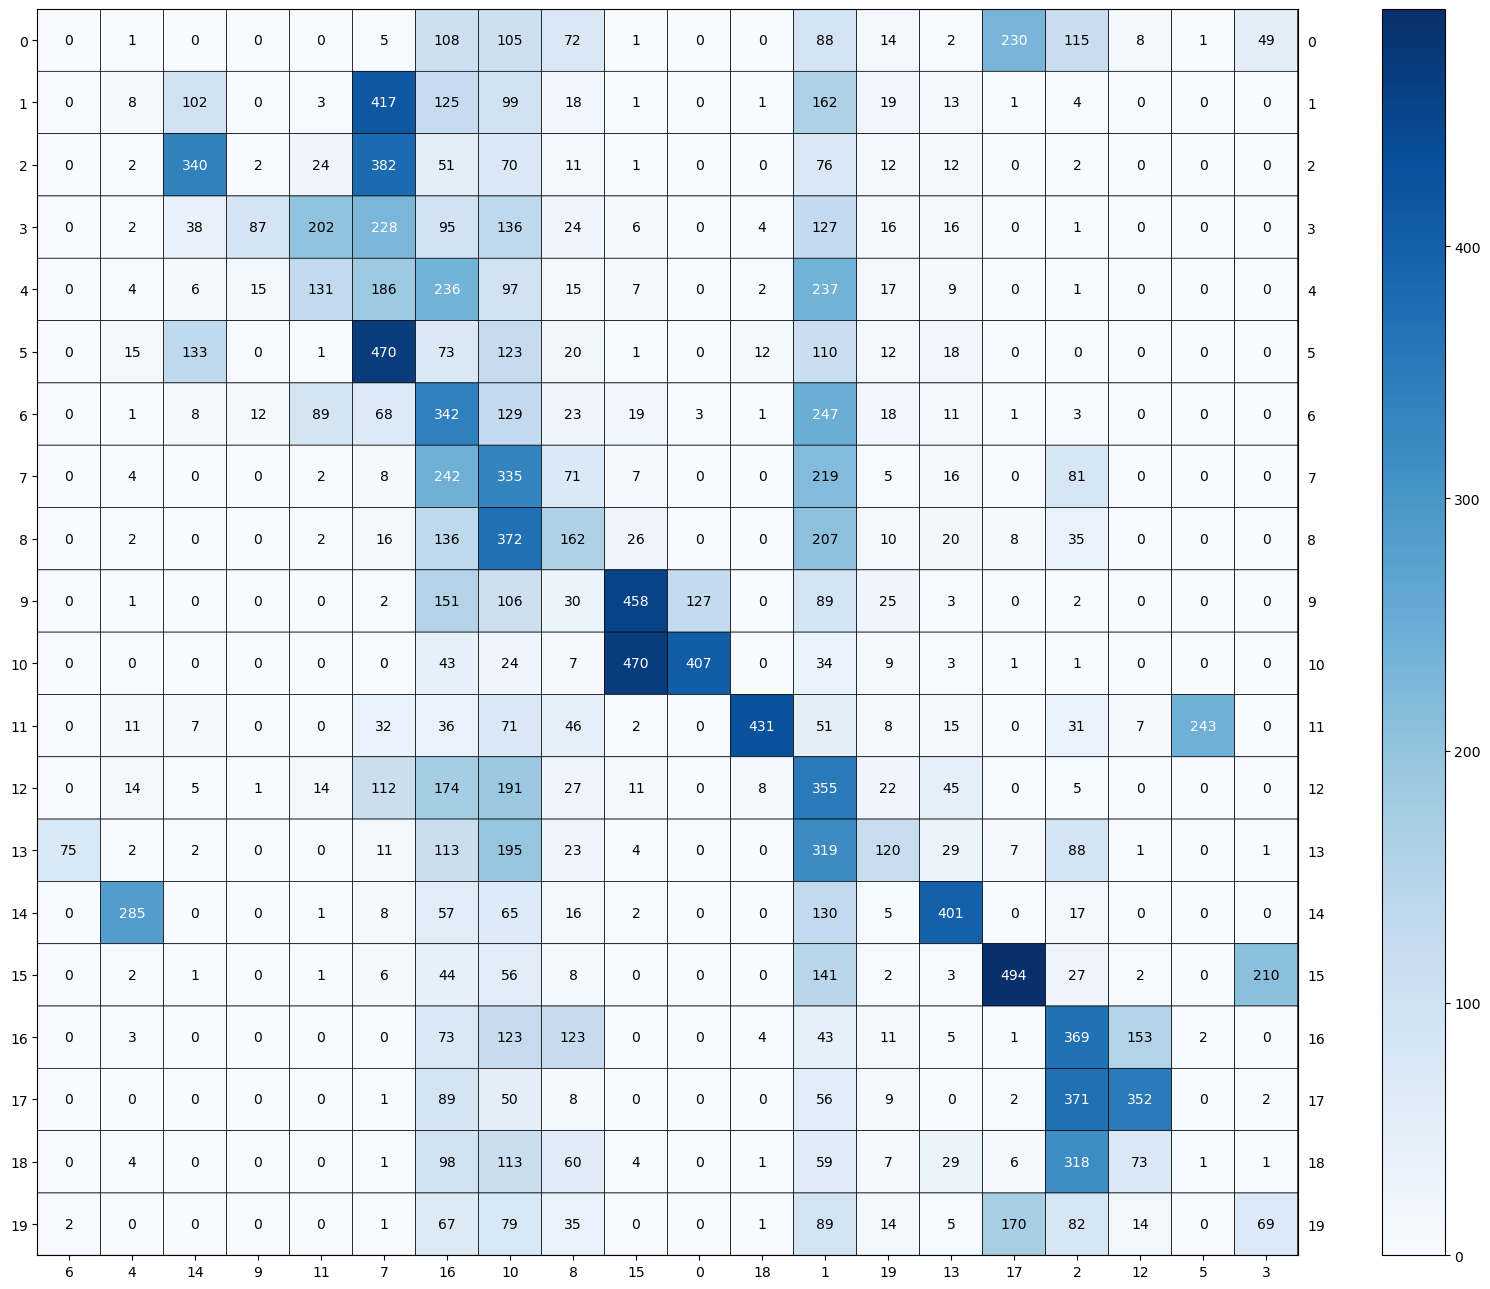

Homogeneity (NMF, best r): 0.317
Completeness (NMF, best r): 0.357
V-measure (NMF, best r): 0.335
Adjusted Rand-Index (NMF, best r): 0.124
Adjusted Mutual Information Score (NMF, best r): 0.333


In [17]:
#nmf when n_components = 10 
from scipy.optimize import linear_sum_assignment
nmf_data_10 = NMF(n_components = 10).fit_transform(X20_train_tfidf)
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30)
y20_pred = kmeans.fit_predict(nmf_data_10)
con_mat20 = contingency_matrix(labels20,y20_pred)
print("NMF Contingency table: \n", con_mat20)

rows, cols = linear_sum_assignment(con_mat20, maximize=True)
plot_mat(con_mat20[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,13))
print("Homogeneity (NMF, best r): %0.3f" % homogeneity_score(labels20, y20_pred))
print("Completeness (NMF, best r): %0.3f" % completeness_score(labels20, y20_pred))
print("V-measure (NMF, best r): %0.3f" % v_measure_score(labels20, y20_pred))
print("Adjusted Rand-Index (NMF, best r): %.3f"% adjusted_rand_score(labels20, y20_pred))
print("Adjusted Mutual Information Score (NMF, best r): %.3f"% adjusted_mutual_info_score(labels20, y20_pred))

SVD Contingency table: 
 [[ 31   0   1   0  24   2 181   0 130   0  14   0   0 371  38   4   0   3
    0   0]
 [  7   0   0   0  17   1   1   0   0   0   2   0   0 310   0   2   2 631
    0   0]
 [ 16   0   0   9  17   0   0   0   0   0   7   0   0 141   0   0   2 793
    0   0]
 [ 31   1   0 182   8   0   0   0   1   0   6   0   0 204   0   0   3 546
    0   0]
 [ 27   0   0  67  21   0   0   1   0   0  18   0   0 289   0   7  14 519
    0   0]
 [  4   0   4   0   3   0   0   0   0   0  21   0   0 208   0   0   2 746
    0   0]
 [ 14  10   0  43   5   5   0   8   0   0  15   0   0 629   0   5  33 208
    0   0]
 [ 22   0   0   0  47   3   0   0   0   0  18   0   0 862   0   0  32   6
    0   0]
 [  9   0   0   0  13   0   0   0   0   0  11   0   0 949   0   0   6   8
    0   0]
 [  2 646   0   0  20   4   0  19   0   0   9   0   0 258   0  26   7   3
    0   0]
 [  6  25   0   0   2   0   0 757   0   0  52   0   0 149   0   2   6   0
    0   0]
 [  0   0 550   0   5  16   0   0   0   

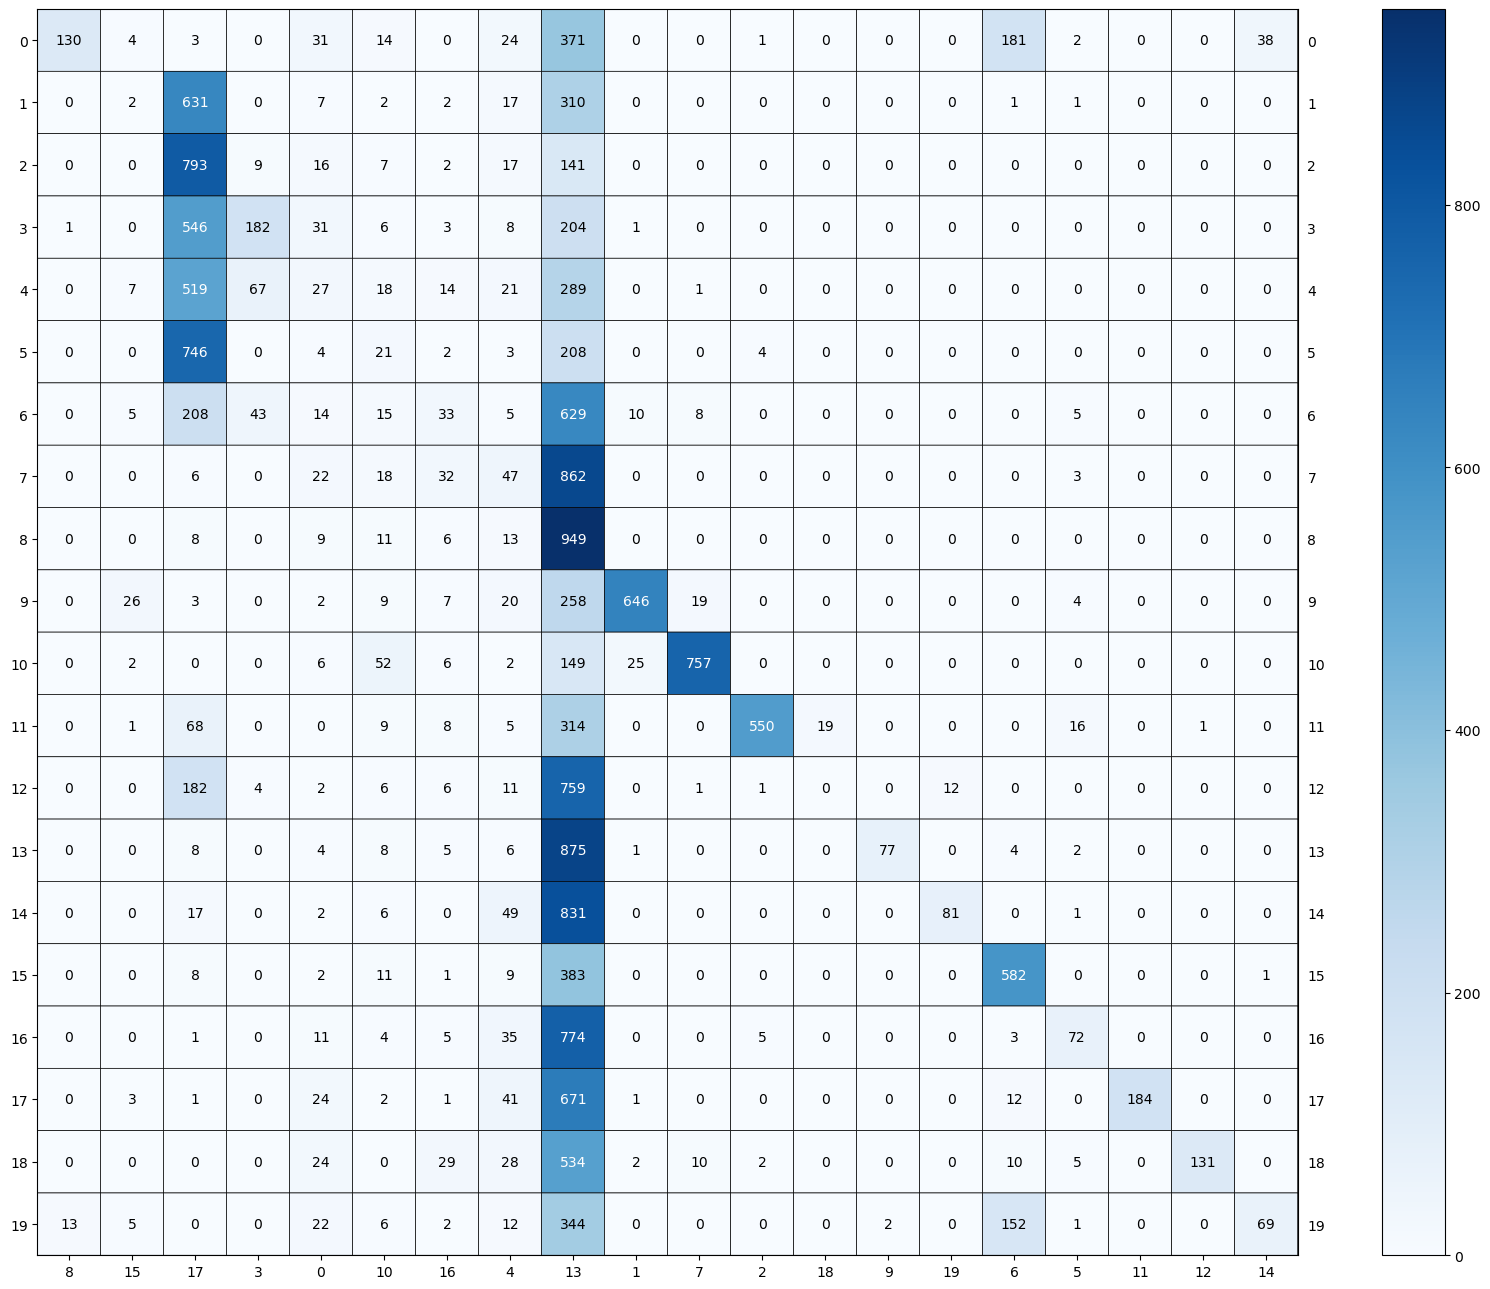

Homogeneity (SVD, best r): 0.284
Completeness (SVD, best r): 0.494
V-measure (SVD, best r): 0.361
Adjusted Rand-Index (SVD, best r): 0.076
Adjusted Mutual Information Score (SVD, best r): 0.358


In [18]:
#svd when n_components = 300
SVD_data_300 = TruncatedSVD(n_components = 300).fit_transform(X20_train_tfidf)
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30)
y20_pred = kmeans.fit_predict(SVD_data_300)
con_mat20 = contingency_matrix(labels20,y20_pred)
print("SVD Contingency table: \n", con_mat20)
#con_mat20 = confusion_matrix(labels20, y20_pred)
rows, cols = linear_sum_assignment(con_mat20, maximize=True)
plot_mat(con_mat20[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,13))
print("Homogeneity (SVD, best r): %0.3f" % homogeneity_score(labels20, y20_pred))
print("Completeness (SVD, best r): %0.3f" % completeness_score(labels20, y20_pred))
print("V-measure (SVD, best r): %0.3f" % v_measure_score(labels20, y20_pred))
print("Adjusted Rand-Index (SVD, best r): %.3f"% adjusted_rand_score(labels20, y20_pred))
print("Adjusted Mutual Information Score (SVD, best r): %.3f"% adjusted_mutual_info_score(labels20, y20_pred))

# Question 11
Reduce the dimension of your dataset with UMAP. Consider the following
settings: n components = [5, 20, 200], metric = ”cosine” vs. ”euclidean”. If ”cosine” metric
fails, please look at the FAQ at the end of this spec.
Report the permuted contingency matrix and the five clustering evaluation metrics
for the different combinations (6 combinations).

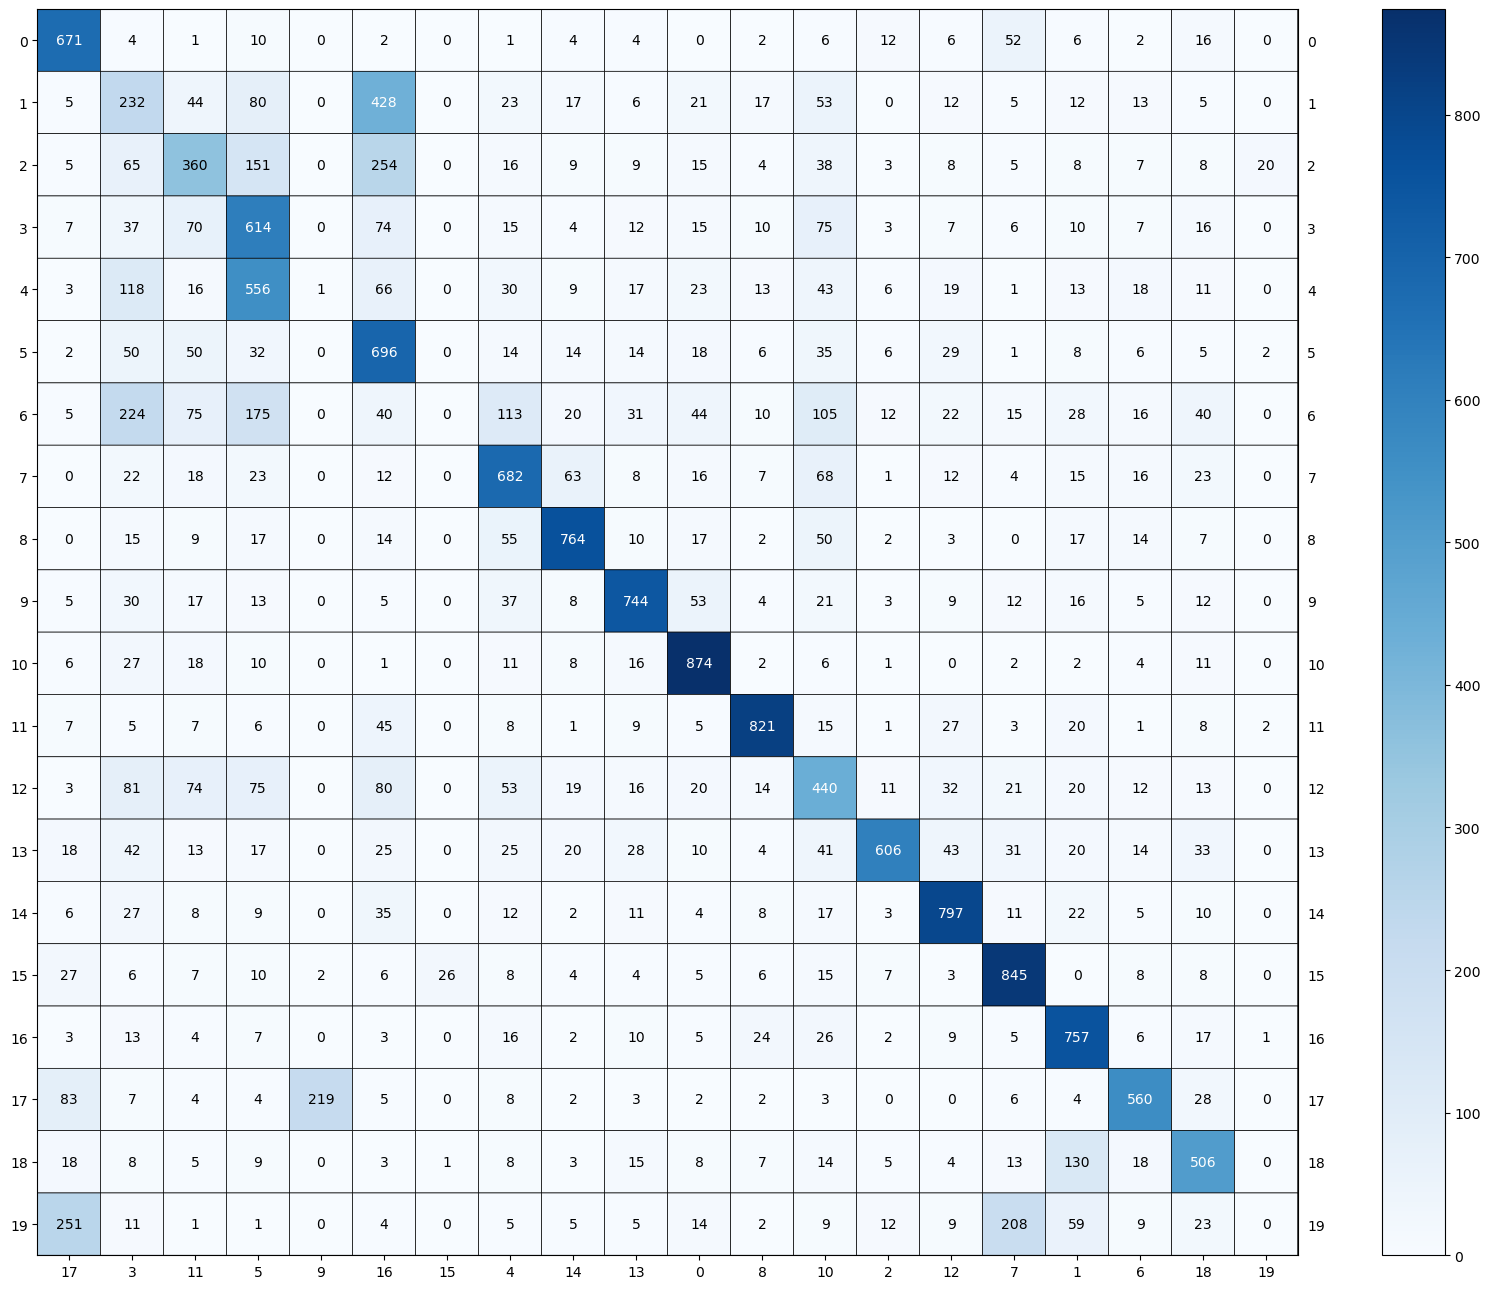

n_components:  5 metric:  cosine
Homogeneity : 0.497
Completeness : 0.523
V-measure : 0.509
Adjusted Rand-Index : 0.399
Adjusted Mutual Information Score : 0.508


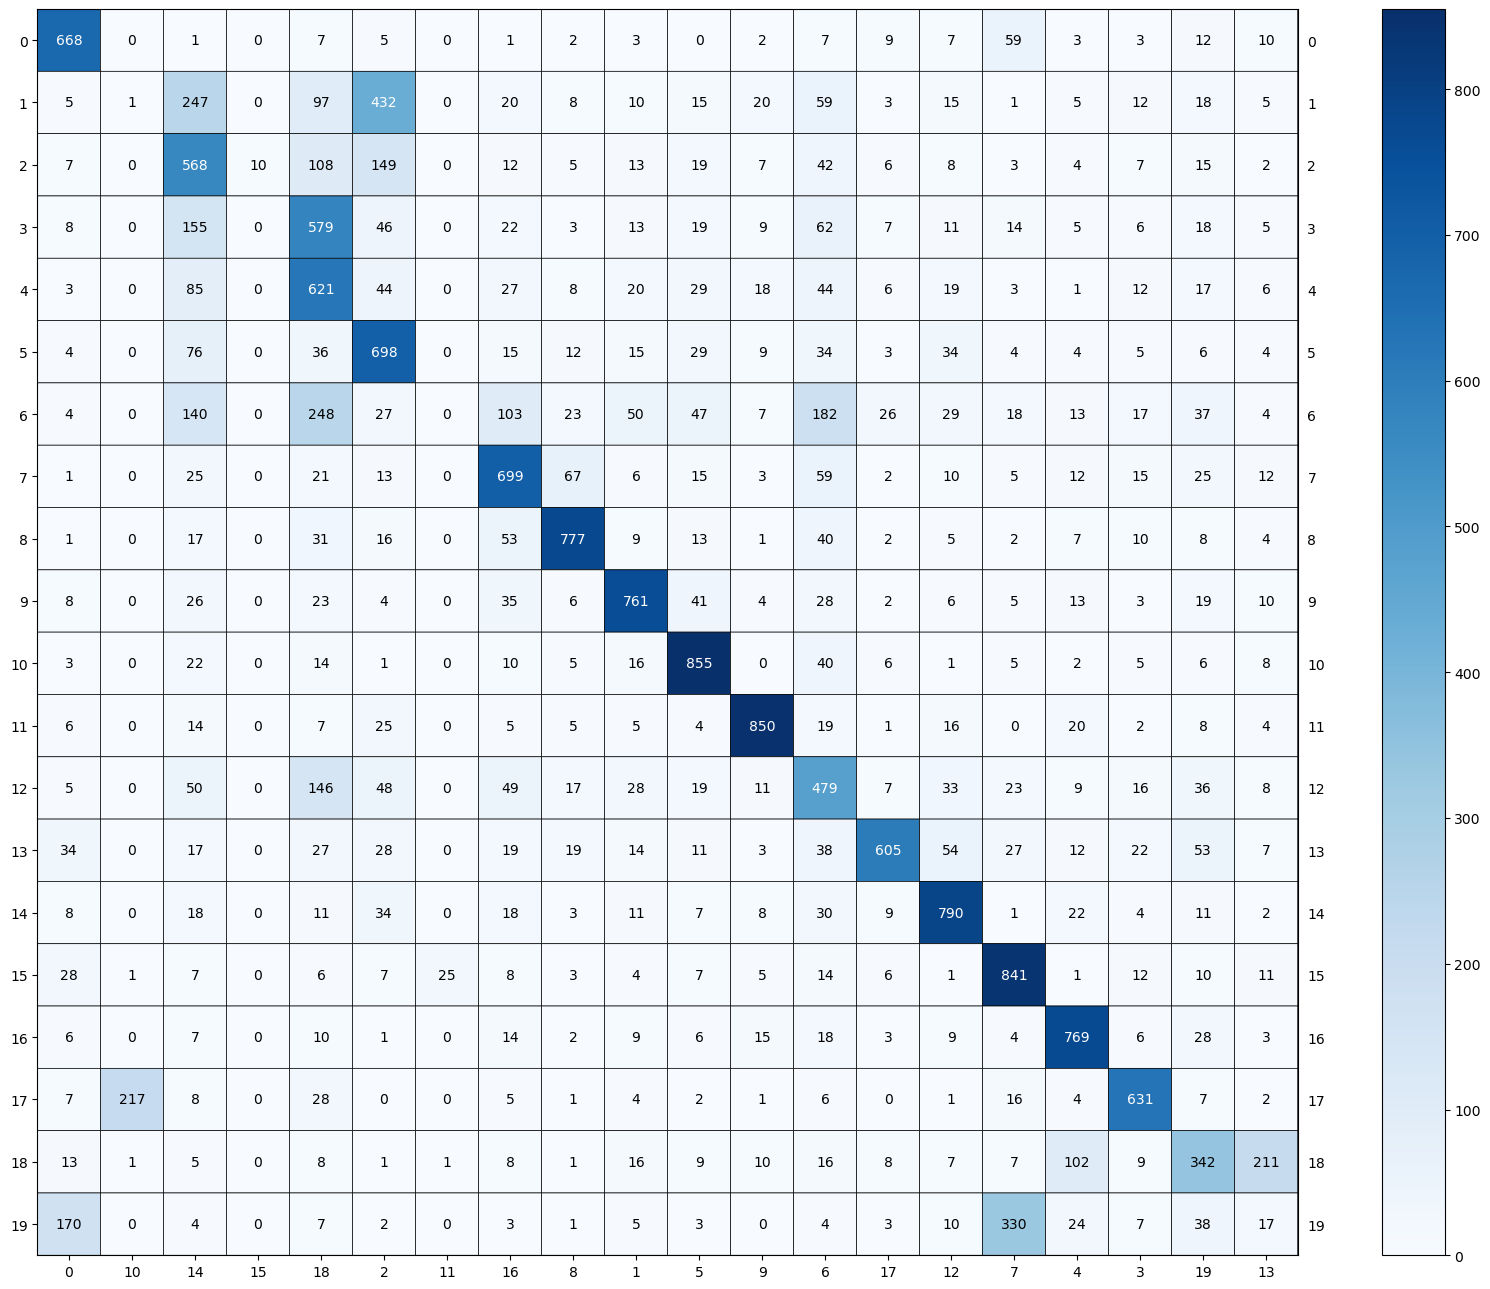

n_components:  5 metric:  euclidean
Homogeneity : 0.507
Completeness : 0.539
V-measure : 0.523
Adjusted Rand-Index : 0.406
Adjusted Mutual Information Score : 0.521


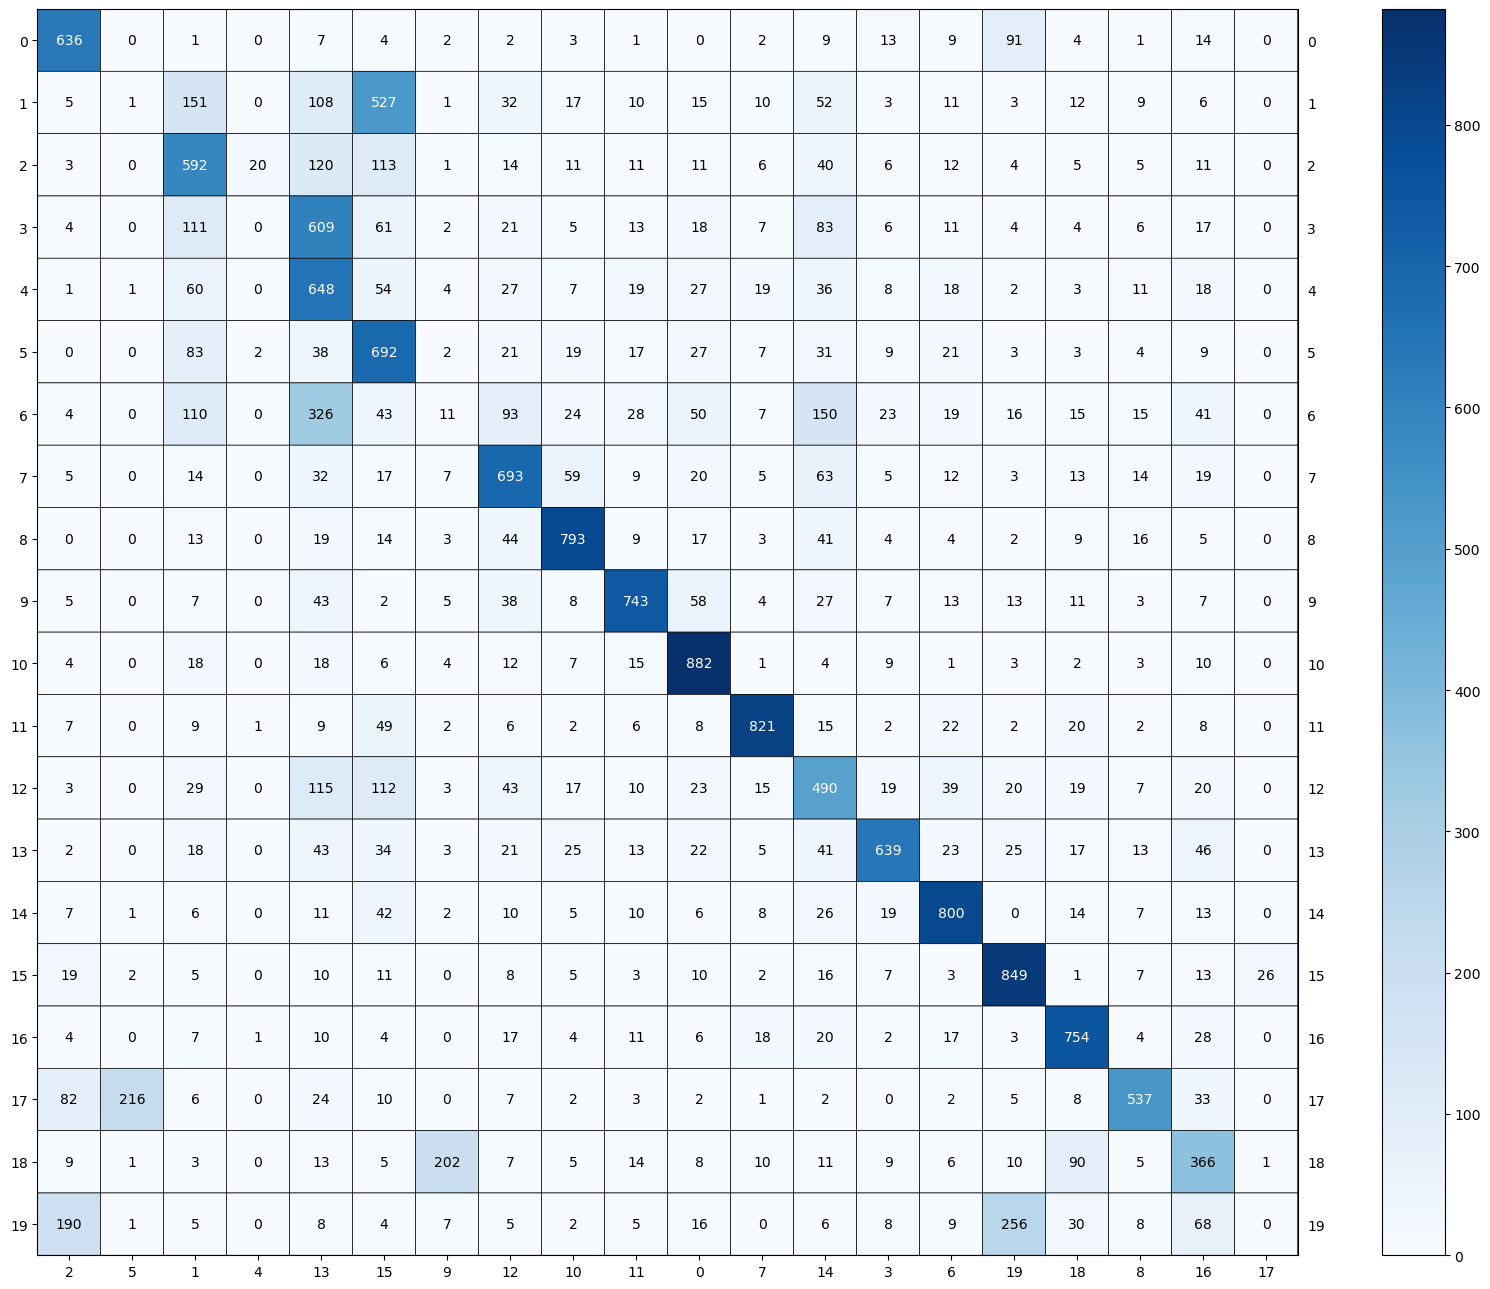

n_components:  20 metric:  cosine
Homogeneity : 0.504
Completeness : 0.537
V-measure : 0.520
Adjusted Rand-Index : 0.401
Adjusted Mutual Information Score : 0.518


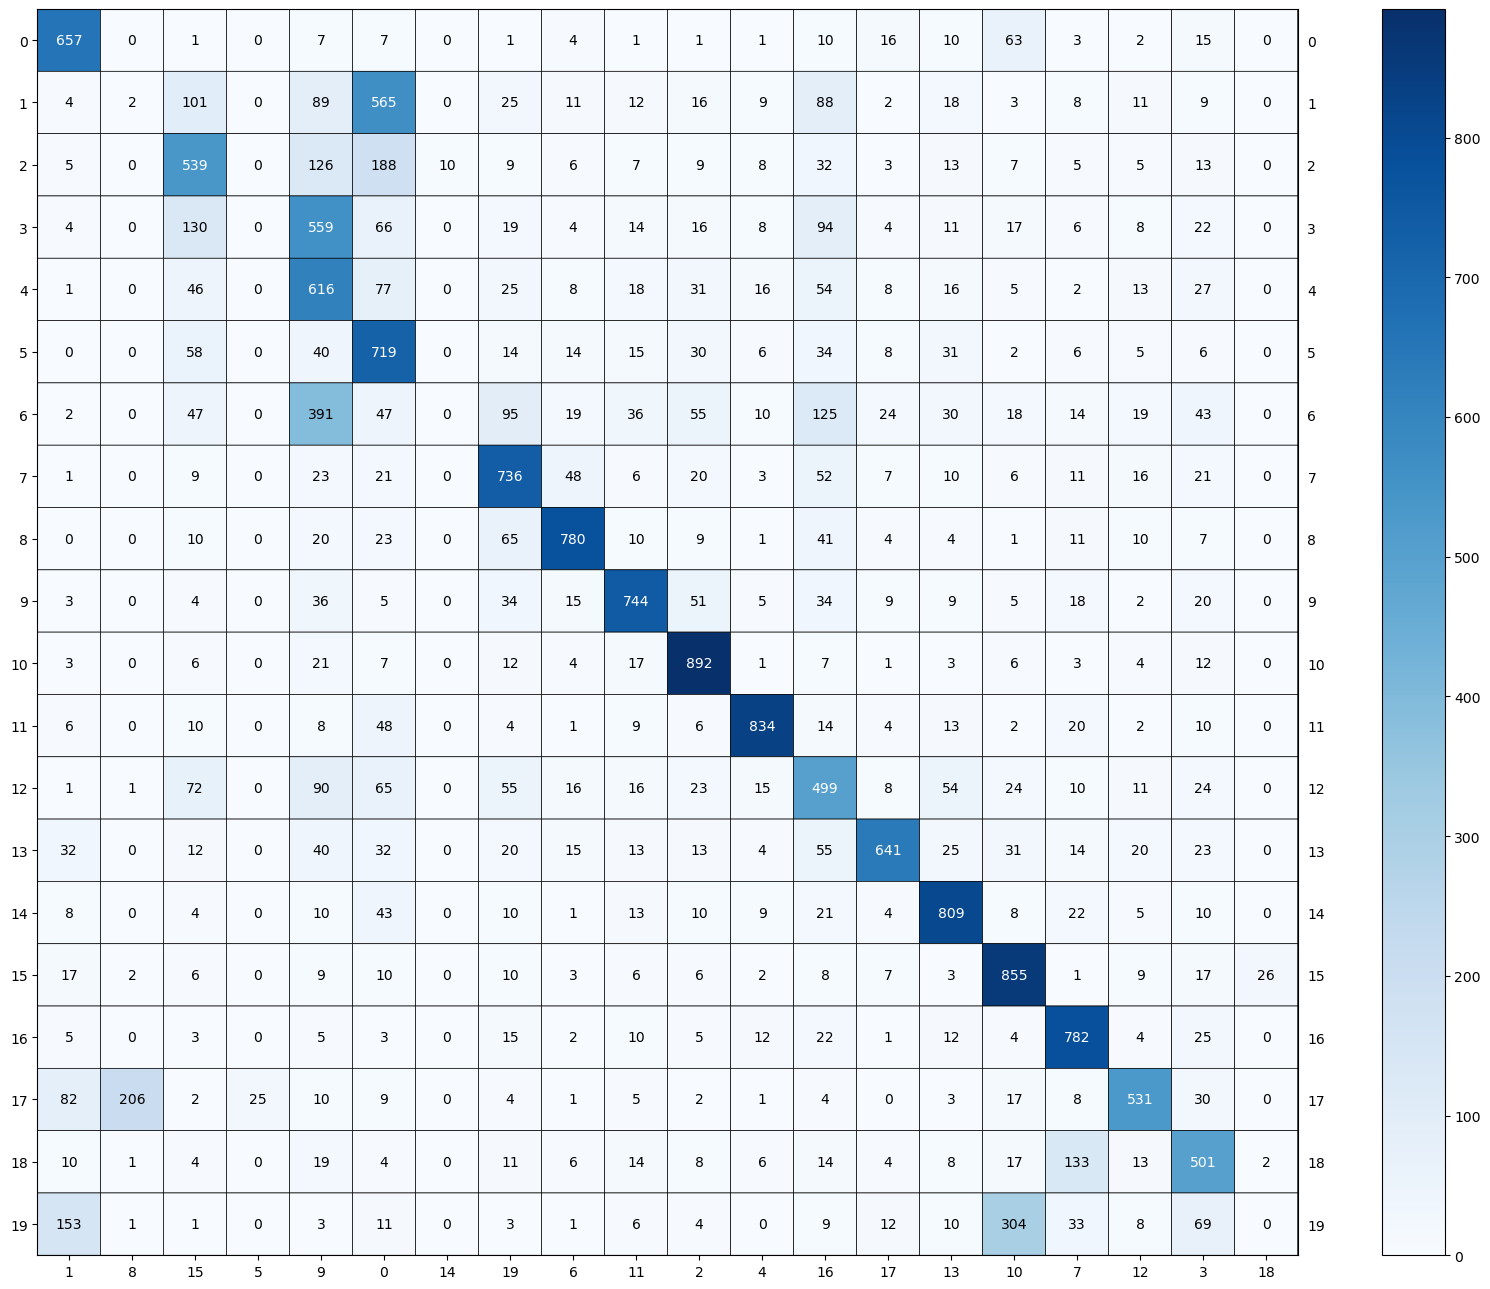

n_components:  20 metric:  euclidean
Homogeneity : 0.507
Completeness : 0.547
V-measure : 0.526
Adjusted Rand-Index : 0.408
Adjusted Mutual Information Score : 0.524


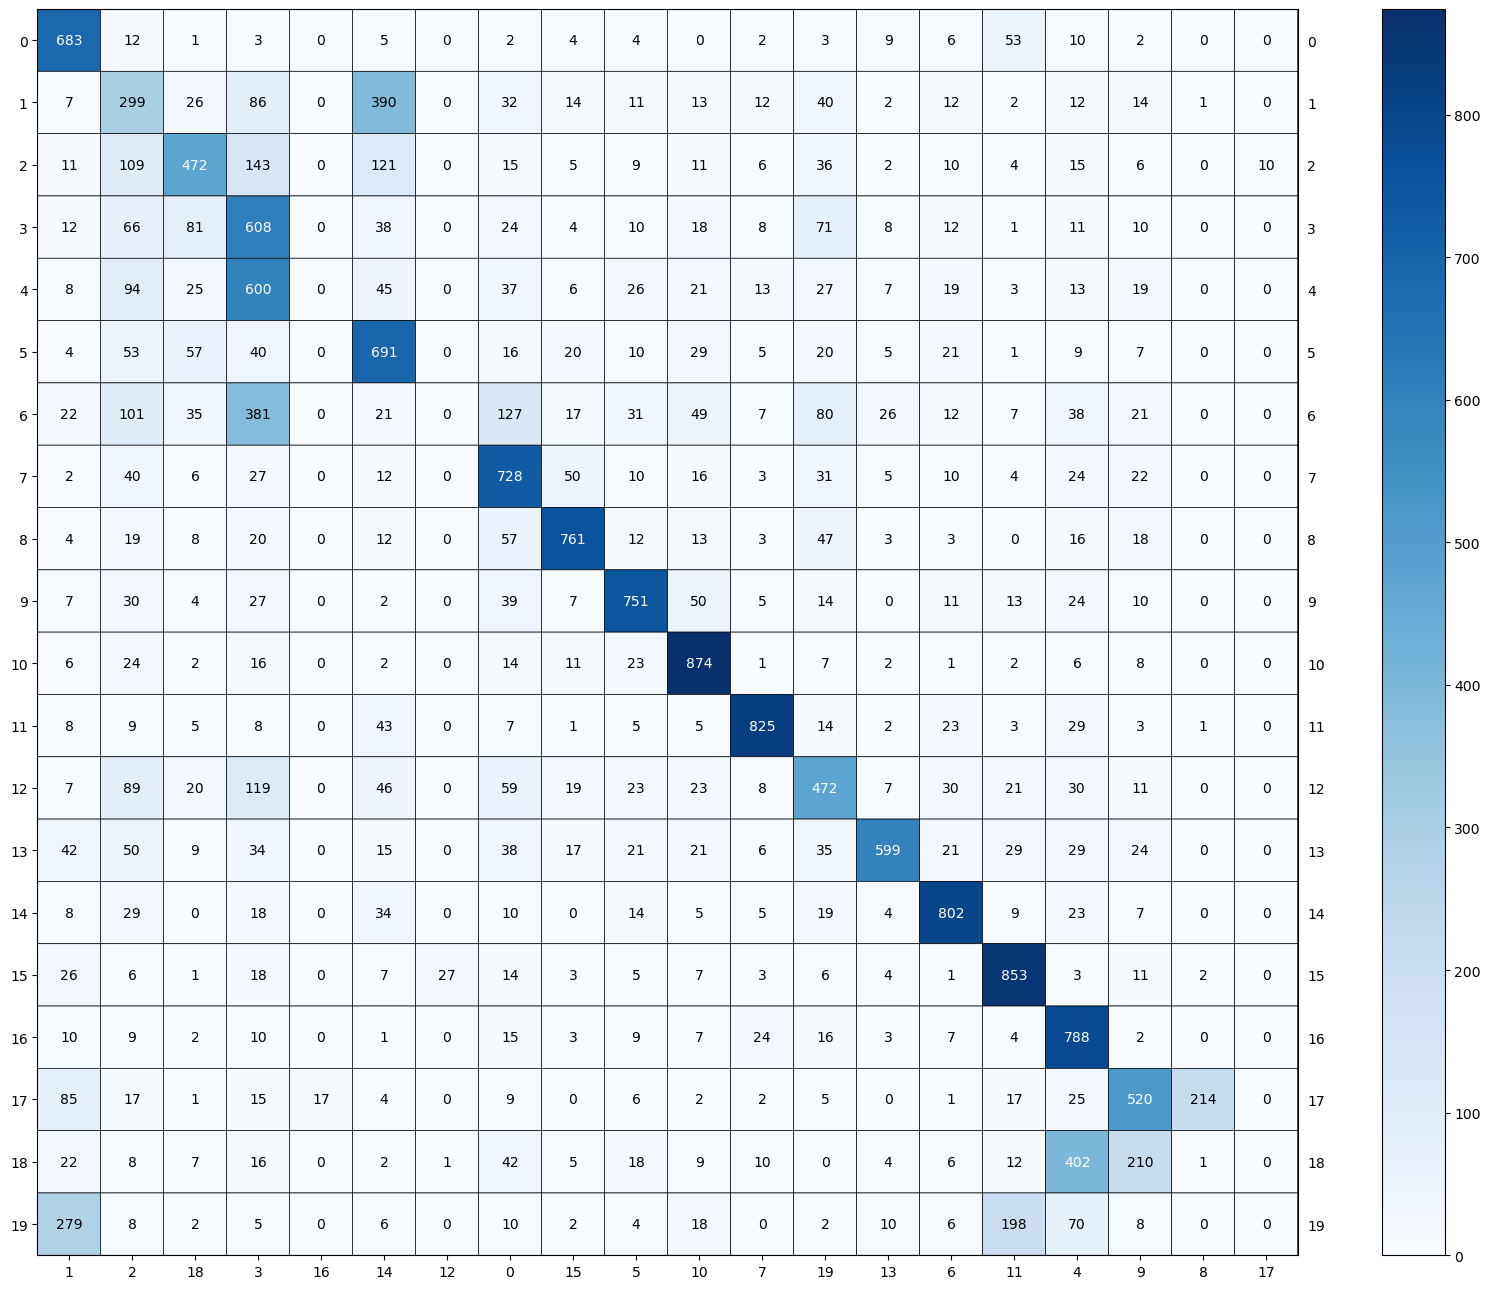

n_components:  200 metric:  cosine
Homogeneity : 0.492
Completeness : 0.530
V-measure : 0.510
Adjusted Rand-Index : 0.391
Adjusted Mutual Information Score : 0.508


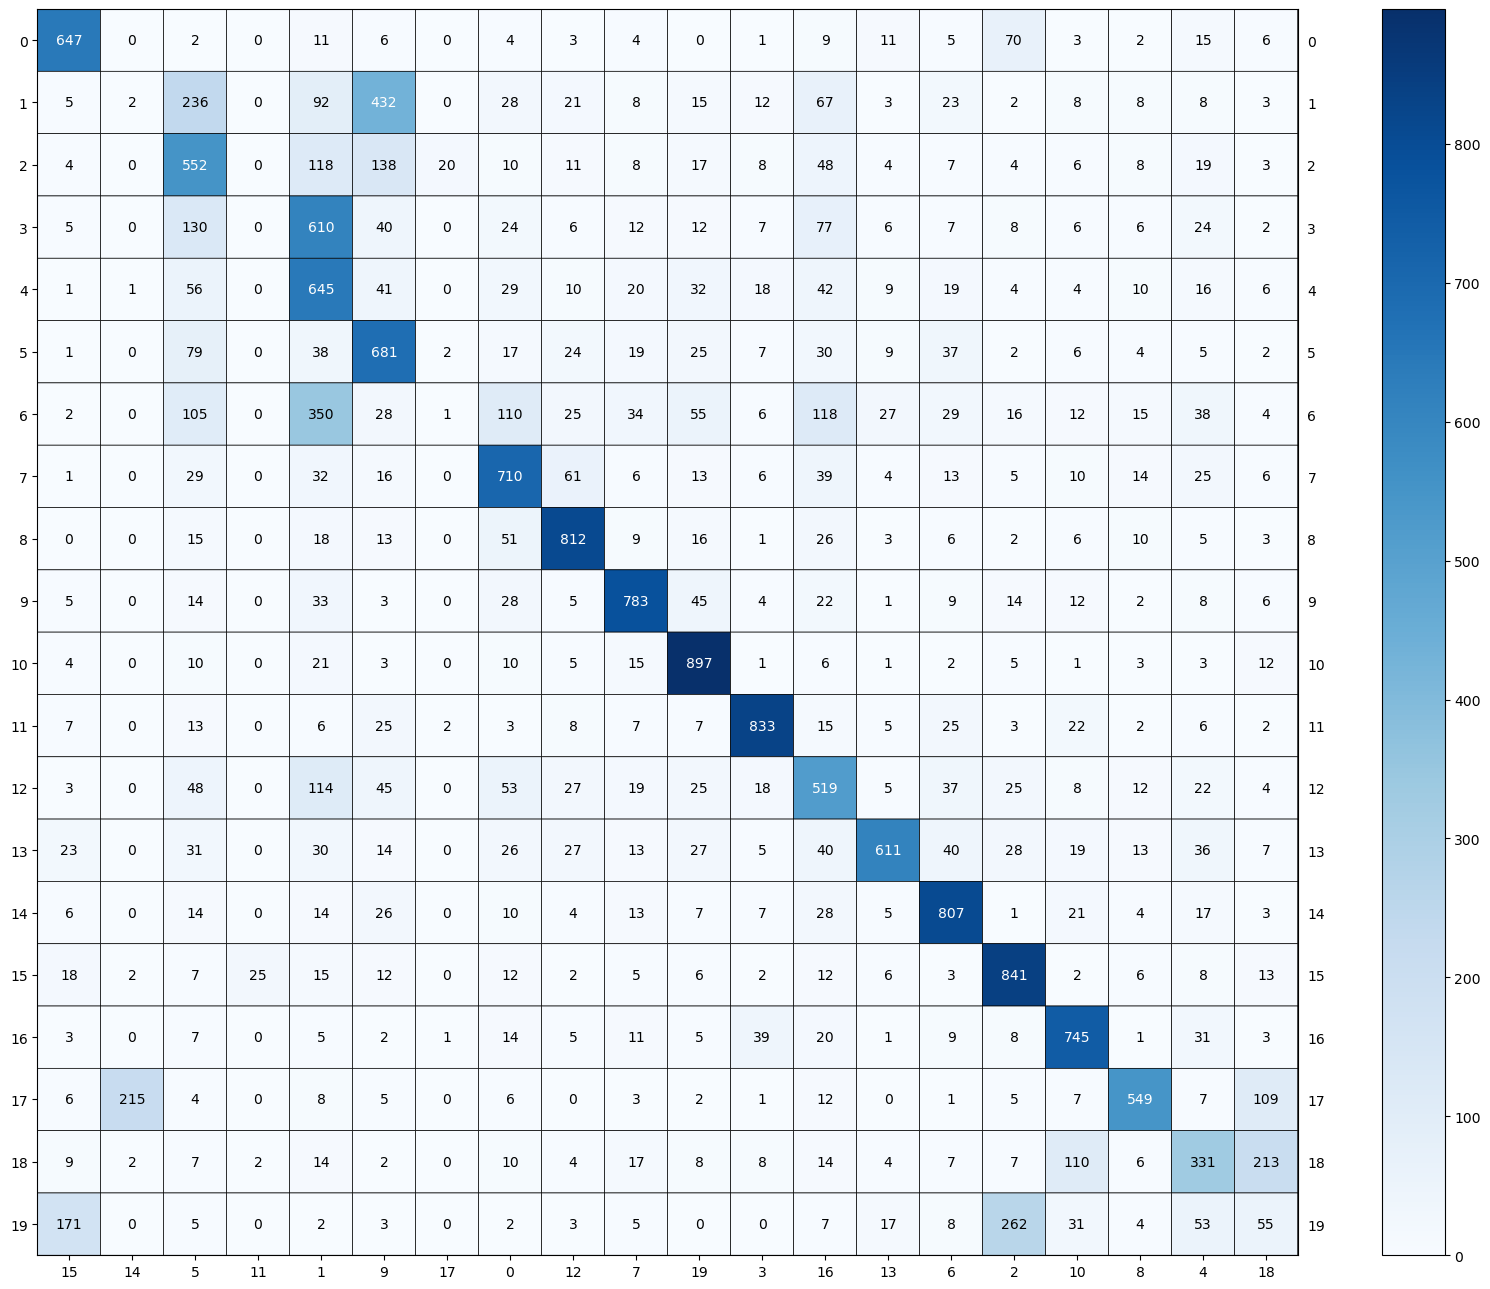

n_components:  200 metric:  euclidean
Homogeneity : 0.509
Completeness : 0.540
V-measure : 0.524
Adjusted Rand-Index : 0.409
Adjusted Mutual Information Score : 0.523


In [26]:
#UMAP to reduce dementionality
#!pip install umap-learn

import umap.umap_ as umap
n_components = [5,20,200] 
metric = ["cosine", "euclidean"]
for i in n_components:
    for j in metric:
        umap20 = umap.UMAP(n_components=i, metric=j).fit_transform(X20_train_tfidf)
        kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30)
        y20_pred = kmeans.fit_predict(umap20)
        con_mat20 = contingency_matrix(labels20,y20_pred)
        rows, cols = linear_sum_assignment(con_mat20, maximize=True)
        plot_mat(con_mat20[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,13))
        print("n_components: ", i, "metric: ", j)
        print("Homogeneity : %0.3f" % homogeneity_score(labels20, y20_pred))
        print("Completeness : %0.3f" % completeness_score(labels20, y20_pred))
        print("V-measure : %0.3f" % v_measure_score(labels20, y20_pred))
        print("Adjusted Rand-Index : %.3f"% adjusted_rand_score(labels20, y20_pred))
        print("Adjusted Mutual Information Score : %.3f"% adjusted_mutual_info_score(labels20, y20_pred))
        

# QUESTION 13:
So far, we have attempted K-Means clustering with 4 different representation
learning techniques (sparse TF-IDF representation, PCA-reduced, NMF-reduced, UMAP-reduced).
Compare and contrast the clustering results across the 4 choices, and suggest an approach that is
best for the K-Means clustering task on the 20-class text data. Choose any choice of clustering
metrics for your comparison.
### A: According to the measure score results above, we can observe that it has the best performance on average when using the UMAP reduction using euclidean as metric and set the n_components to 20.

# QUESTION 14: 
Use UMAP to reduce the dimensionality properly, and perform Agglom-
erative clustering with n_clusters=20 . Compare the performance of “ward” and “single”
linkage criteria.
Report the five clustering evaluation metrics for each case.

In [12]:
#BEST n_components = 20, metric = euclidean, linkage = ward
from sklearn.cluster import AgglomerativeClustering
umap20 = umap.UMAP(n_components=20, metric='euclidean').fit_transform(X20_train_tfidf)
agg_cluster = AgglomerativeClustering(n_clusters = 20, linkage = 'ward')
y20_pred = agg_cluster.fit(umap20)
print("n_clusters: 20,  linkage: ward")
print("Homogeneity : %0.3f" % homogeneity_score(labels20, y20_pred.labels_))
print("Completeness : %0.3f" % completeness_score(labels20, y20_pred.labels_))
print("V-measure : %0.3f" % v_measure_score(labels20, y20_pred.labels_))
print("Adjusted Rand-Index : %.3f"% adjusted_rand_score(labels20, y20_pred.labels_))
print("Adjusted Mutual Information Score : %.3f"% adjusted_mutual_info_score(labels20, y20_pred.labels_))
#BEST n_components = 20, metric = euclidean, linkage = ward
X20_train_tfidf = tfidf_vect.fit_transform(dataset_20.data)
agg_cluster = AgglomerativeClustering(n_clusters = 20, linkage = 'single')
y20_pred = agg_cluster.fit(umap20)
print("\n""n_clusters: 20,  linkage: single")
print("Homogeneity : %0.3f" % homogeneity_score(labels20, y20_pred.labels_))
print("Completeness : %0.3f" % completeness_score(labels20, y20_pred.labels_))
print("V-measure : %0.3f" % v_measure_score(labels20, y20_pred.labels_))
print("Adjusted Rand-Index : %.3f"% adjusted_rand_score(labels20, y20_pred.labels_))
print("Adjusted Mutual Information Score : %.3f"% adjusted_mutual_info_score(labels20, y20_pred.labels_))

n_clusters: 20,  linkage: ward
Homogeneity : 0.481
Completeness : 0.524
V-measure : 0.502
Adjusted Rand-Index : 0.365
Adjusted Mutual Information Score : 0.500

n_clusters: 20,  linkage: single
Homogeneity : 0.022
Completeness : 0.328
V-measure : 0.042
Adjusted Rand-Index : 0.001
Adjusted Mutual Information Score : 0.036


# QUESTION 15: 
Apply HDBSCAN on UMAP-transformed 20-category data.
Use min_cluster_size=100 .
Vary the min cluster size among 20, 100, 200 and report your findings in terms of the
five clustering evaluation metrics - you will plot the best contingency matrix in the
next question. Feel free to try modifying other parameters in HDBSCAN to get
better performance.

In [13]:
import hdbscan
size=[20,100,200]
for i in size:
    umap20 = umap.UMAP(n_components=20, metric='euclidean').fit_transform(X20_train_tfidf)
    hdb = hdbscan.HDBSCAN(min_cluster_size = i)
    y20_pred = hdb.fit(umap20)
    print("\n""hdbscan,min_cluster_size: ", i)
    print("Homogeneity : %0.3f" % homogeneity_score(labels20, y20_pred.labels_))
    print("Completeness : %0.3f" % completeness_score(labels20, y20_pred.labels_))
    print("V-measure : %0.3f" % v_measure_score(labels20, y20_pred.labels_))
    print("Adjusted Rand-Index : %.3f"% adjusted_rand_score(labels20, y20_pred.labels_))
    print("Adjusted Mutual Information Score : %.3f"% adjusted_mutual_info_score(labels20, y20_pred.labels_))
    
    


hdbscan,min_cluster_size:  20
Homogeneity : 0.422
Completeness : 0.376
V-measure : 0.398
Adjusted Rand-Index : 0.058
Adjusted Mutual Information Score : 0.380

hdbscan,min_cluster_size:  100
Homogeneity : 0.014
Completeness : 0.488
V-measure : 0.027
Adjusted Rand-Index : 0.001
Adjusted Mutual Information Score : 0.026

hdbscan,min_cluster_size:  200
Homogeneity : 0.013
Completeness : 0.455
V-measure : 0.026
Adjusted Rand-Index : 0.001
Adjusted Mutual Information Score : 0.025


# QUESTION 16: 
Contingency matrix
Plot the contingency matrix for the best clustering model from Question 15.
How many clusters are given by the model? What does “-1” mean for the clustering labels?
Interpret the contingency matrix considering the answer to these questions.

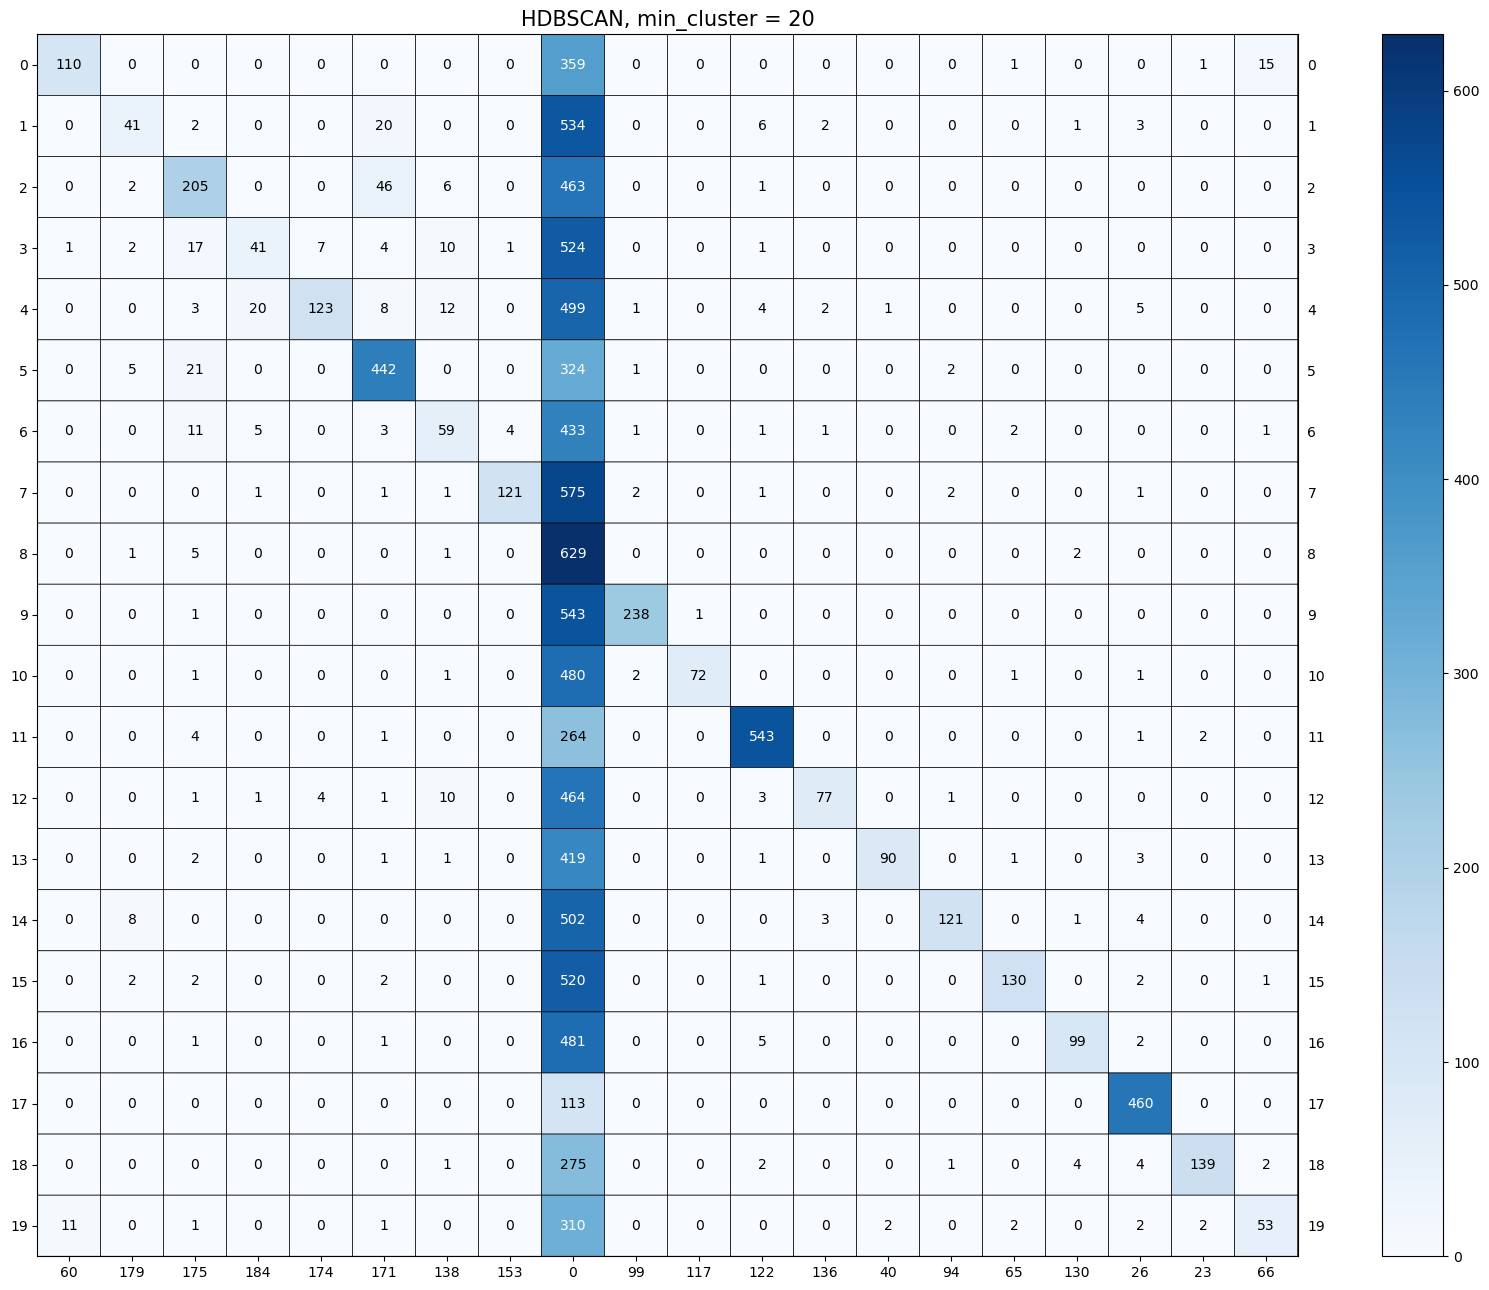

In [14]:
umap20 = umap.UMAP(n_components=20, metric='euclidean').fit_transform(X20_train_tfidf)
hdb = hdbscan.HDBSCAN(min_cluster_size = 20)
y20_pred = hdb.fit(umap20)
con_mat20 = contingency_matrix(labels20,y20_pred.labels_)
rows, cols = linear_sum_assignment(con_mat20, maximize=True)
plot_mat(con_mat20[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,13),title = 'HDBSCAN, min_cluster = 20')

# QUESTION 17:
Based on your experiments, which dimensionality reduction technique and clus-tering methods worked best together for 20-class text data and why? Follow the table below. If UMAP takes too long to converge, consider running it once and saving the intermediate results ina pickle file.Hint: DBSCAN and HDBSCAN do not accept the number of clusters as an input parameter. So pay close attention to how
the different clustering metrics are being computed for these methods.

*Running the cells below takes too long for every combinations. However I use the testing results of the previous questiond to assume that using dimentionality reduction:umap.UMAP(n_components=200, metric='euclidean') and clustering method:KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30) is the best performance. And the following is the result:

Homogeneity : 0.515
Completeness : 0.535
V-measure : 0.525
Adjusted Rand-Index : 0.418
Adjusted Mutual Information Score : 0.523

In [10]:
umap200 = umap.UMAP(n_components=200, metric='euclidean').fit_transform(X20_train_tfidf)
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30)
y20_pred = kmeans.fit_predict(umap200)
print("Homogeneity : %0.3f" % homogeneity_score(labels20, y20_pred))
print("Completeness : %0.3f" % completeness_score(labels20, y20_pred))
print("V-measure : %0.3f" % v_measure_score(labels20, y20_pred))
print("Adjusted Rand-Index : %.3f"% adjusted_rand_score(labels20, y20_pred))
print("Adjusted Mutual Information Score : %.3f"% adjusted_mutual_info_score(labels20, y20_pred))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Homogeneity : 0.515
Completeness : 0.535
V-measure : 0.525
Adjusted Rand-Index : 0.418
Adjusted Mutual Information Score : 0.523


### Normal way but runtime too long

In [9]:
import pandas as pd
df = pd.DataFrame(columns = ['Dimentionality Reduction','Clustering','Homogeneity score','Completeness score','V-measure score','Adjusted Rand score','Adjusted Mutual Information score','Average Score'])
X20_train_tfidf = tfidf_vect.fit_transform(dataset_20.data)

In [6]:
import numpy as np
import sklearn
import nltk, string
import matplotlib.pyplot as plt
import pandas as pd
import hdbscan
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import AgglomerativeClustering
import umap.umap_ as umap
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.utils.extmath import randomized_svd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

In [ ]:
reduce_dim = [TruncatedSVD(n_components=5, random_state=42), 
               TruncatedSVD(n_components=20, random_state=42), 
               TruncatedSVD(n_components=200, random_state=42),
               umap.UMAP(n_components=5, metric='cosine'),
               umap.UMAP(n_components=20, metric='cosine'),
               umap.UMAP(n_components=200, metric='cosine'),
               NMF(n_components=5, init='random', random_state=42),
               NMF(n_components=20, init='random', random_state=42),
               NMF(n_components=200, init='random', random_state=42)]

clustering = [KMeans( max_iter=1000, n_clusters=10, n_init=30, random_state=0),
                KMeans( max_iter=1000, n_clusters=20, n_init=30, random_state=0),
                KMeans( max_iter=1000, n_clusters=50, n_init=30, random_state=0),
                AgglomerativeClustering(n_clusters=20),
                hdbscan.HDBSCAN(min_cluster_size=100),
                hdbscan.HDBSCAN(min_cluster_size=200)]  
#for none
for j in range(len(clustering)):
        cluster = clustering[j]
        result = cluster.fit_predict(X20_train_tfidf.toarray())
        hom = homogeneity_score(dataset_20.target, result)
        com = completeness_score(dataset_20.target, result)
        measure = v_measure_score(dataset_20.target, result)
        rand = adjusted_rand_score(dataset_20.target, result)
        mutual = adjusted_mutual_info_score(dataset_20.target, result)
        average = 0.2*(hom + com + measure + rand + mutual)
        df.loc[len(df.index)] = ['None',str(clustering[j]), hom, com, measure, rand, mutual, average] 
        print("test: ", j)
#for other dimensionality reduction
for i in range(3):
    for j in range(len(clustering)):
        
        reduce = reduce_dim[i]
        red_vec = reduce.fit_transform(X20_train_tfidf)
        cluster = clustering[j]
        result = cluster.fit_predict(red_vec)
        hom = homogeneity_score(dataset_20.target, result)
        com = completeness_score(dataset_20.target, result)
        measure = v_measure_score(dataset_20.target, result)
        rand = adjusted_rand_score(dataset_20.target, result)
        mutual = adjusted_mutual_info_score(dataset_20.target, result)
        average = 0.2*(hom + com + measure + rand + mutual)
        df.loc[len(df.index)] = [str(reduce_dim[i]),str(clustering[j]), hom, com, measure, rand, mutual, average] 
        print("test: ", i , j )

# QUESTION 18:
Extra credit: If you can find creative ways to further enhance the clustering
performance, report your method and the results you obtain.

### A: To enhance the performance, I look up online and found a better clustering metthods that is similar to k-means, which is called K-medoids. The k-medoids algorithm is a clustering algorithm related to the k-means algorithm and the medoidshift algorithm. Both the k-means and k-medoids algorithms are partitional (breaking the dataset up into groups). K-means attempts to minimize the total squared error, while k-medoids minimizes the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the k-means algorithm, k-medoids chooses datapoints as centers ( medoids or exemplars).It could be more robust to noise and outliers as compared to k-means because it minimizes a sum of general pairwise dissimilarities instead of a sum of squared Euclidean distances. 

### The following are the results, we may see that using kmeans and k-medoids barely has no difference on performance in this dataset, which is both pretty decent. 

In [42]:
from sklearn_extra.cluster import KMedoids
umap200 = umap.UMAP(n_components=200, metric='euclidean').fit_transform(X20_train_tfidf)
kmedoids = KMedoids (n_clusters = 20, random_state=0, max_iter=1000).fit(umap200)
print("Homogeneity : %0.3f" % homogeneity_score(labels20, kmedoids.labels_))
print("Completeness : %0.3f" % completeness_score(labels20, kmedoids.labels_))
print("V-measure : %0.3f" % v_measure_score(labels20, kmedoids.labels_))
print("Adjusted Rand-Index : %.3f"% adjusted_rand_score(labels20, kmedoids.labels_))
print("Adjusted Mutual Information Score : %.3f"% adjusted_mutual_info_score(labels20, kmedoids.labels_))

Homogeneity : 0.501
Completeness : 0.526
V-measure : 0.513
Adjusted Rand-Index : 0.411
Adjusted Mutual Information Score : 0.511
